# 1- Introduction

## 🧪 Drug Classification – Multiple ML Models & Scalers

## 📌 Overview:

This project tackles a **drug classification problem** using a real-world dataset. The goal is to predict the most suitable **type of drug** for a patient based on several medical features.

The task is approached using **multiple machine learning models** and **different feature scaling techniques**, allowing us to identify the best combination for optimal performance.

---

## 📁 Dataset Description:

The dataset includes the following columns:

| Feature       | Description                                     |
| ------------- | ----------------------------------------------- |
| `Age`         | Patient's age (categorical)                     |
| `Sex`         | Gender (Male/Female)                            |
| `BP`          | Blood pressure level (LOW, NORMAL, HIGH)        |
| `Cholesterol` | Cholesterol level (NORMAL, HIGH)                |
| `Na_to_K`     | Sodium-to-potassium ratio (numerical)           |
| `Drug`        | **Target label** — Type of drug (A, B, C, X, Y) |

📌 Dataset Source: [Drug Classification | Kaggle](https://www.kaggle.com/datasets/prathamtripathi/drug-classification)

---

## 🔍 Exploratory Data Analysis (EDA):

* Initial inspection using `.head()`, `.info()`, and `.describe()`
* Count plots for categorical features (`Sex`, `BP`, `Cholesterol`)
* Boxplots to analyze how `Na_to_K` varies across drug types
* Observations show a strong relationship between `Na_to_K` and the `Drug` class

---

## 🛠️ Preprocessing:

* Encoding `Age` (category → code)
* Label encoding of categorical features: `Sex`, `BP`, `Cholesterol`
* Separation of features (`X`) and target (`y`)

---

## ⚖️ Feature Scaling Techniques Applied:

To test the effect of feature scaling, the following scalers were applied individually:

| Scaler Type      | Description                         |
| ---------------- | ----------------------------------- |
| `StandardScaler` | Z-score normalization               |
| `MinMaxScaler`   | Scales values to \[0, 1]            |
| `RobustScaler`   | Scales using IQR (handles outliers) |
| `MaxAbsScaler`   | Scales based on max absolute value  |

---

## 🤖 ML Models Trained:

Several classification models were trained and compared:

| Model                          | Description                      |
| ------------------------------ | -------------------------------- |
| `Logistic Regression`          | Linear model for classification  |
| `K-Nearest Neighbors`          | Distance-based classifier        |
| `Support Vector Machine (SVM)` | Maximizes margin between classes |
| `Decision Tree`                | Tree-based, interpretable model  |

---

## 🧪 Evaluation:

Each model + scaler combination was evaluated using:

* **Accuracy**
* **Precision**
* **Recall**
* **F1-Score**

📊 The best performing models were further analyzed using a **classification report** and **confusion matrix**.

---

## 🏆 Best Result:

* **Best Model:** *e.g.,* `SVM`
* **Best Scaler:** *e.g.,* `StandardScaler`
* **F1-Score:** *e.g.,* 0.91

# 2- Import libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3- Import data

In [35]:
df = pd.read_csv("drug200.csv")

In [36]:
# Show first 10 lines in data
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


# 4- Expolratory Data Analysis ''EDA''

## Dataset Info

In [5]:
# Show information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Descriptive Statistics

In [6]:
# Statistical information
df.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


## Drug Count by Gender

In [7]:
df.groupby('Sex')['Drug'].value_counts()

Sex  Drug 
F    DrugY    47
     drugX    27
     drugA     9
     drugC     7
     drugB     6
M    DrugY    44
     drugX    27
     drugA    14
     drugB    10
     drugC     9
Name: count, dtype: int64

## **Grouping Sex & Cholesterol by Drug**

In [8]:
df.groupby(['Sex','Cholesterol'])['Drug'].value_counts()

Sex  Cholesterol  Drug 
F    HIGH         DrugY    22
                  drugX    12
                  drugC     7
                  drugA     6
                  drugB     2
     NORMAL       DrugY    25
                  drugX    15
                  drugB     4
                  drugA     3
M    HIGH         DrugY    25
                  drugC     9
                  drugX     8
                  drugA     6
                  drugB     6
     NORMAL       DrugY    19
                  drugX    19
                  drugA     8
                  drugB     4
Name: count, dtype: int64

## Drug Count by Gender, Cholesterol & Blood Pressure

In [9]:
df.groupby(['Sex','Cholesterol','BP'])['Drug'].value_counts()

Sex  Cholesterol  BP      Drug 
F    HIGH         HIGH    DrugY     9
                          drugA     6
                          drugB     2
                  LOW     DrugY     7
                          drugC     7
                  NORMAL  drugX    12
                          DrugY     6
     NORMAL       HIGH    DrugY    14
                          drugB     4
                          drugA     3
                  LOW     drugX     8
                          DrugY     6
                  NORMAL  drugX     7
                          DrugY     5
M    HIGH         HIGH    DrugY     6
                          drugA     6
                          drugB     6
                  LOW     drugC     9
                          DrugY     8
                  NORMAL  DrugY    11
                          drugX     8
     NORMAL       HIGH    DrugY     9
                          drugA     8
                          drugB     4
                  LOW     drugX    10
                  

## Drug Counts

In [10]:
df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

# 5- EDA Visualization

## **Drug Distribution by Sex, Cholesterol, and BP**

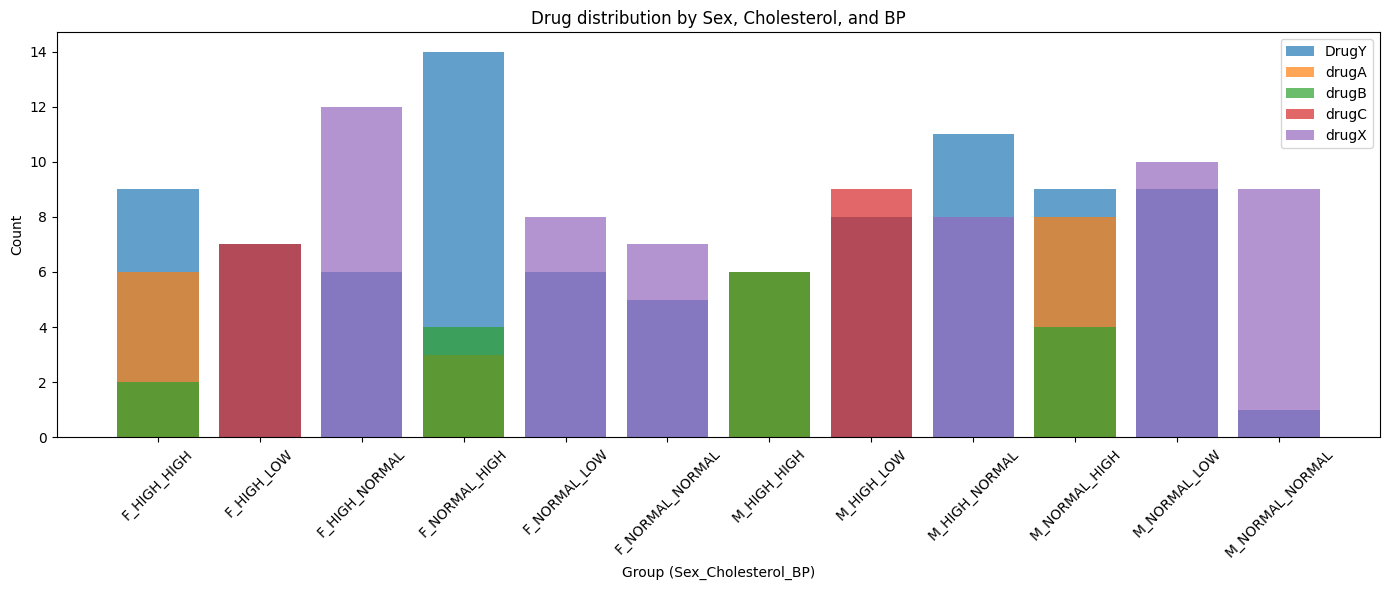

In [11]:
grouped = df.groupby(['Sex', 'Cholesterol', 'BP', 'Drug']).size().reset_index(name='Count')

grouped['Group'] = grouped['Sex'] + '_' + grouped['Cholesterol'] + '_' + grouped['BP']

plt.figure(figsize=(14, 6))
for drug in grouped['Drug'].unique():
    subset = grouped[grouped['Drug'] == drug]
    plt.bar(subset['Group'], subset['Count'], label=drug, alpha=0.7)

plt.xticks(rotation=45)
plt.xlabel('Group (Sex_Cholesterol_BP)')
plt.ylabel('Count')
plt.title('Drug distribution by Sex, Cholesterol, and BP')
plt.legend()
plt.tight_layout()
plt.show()


## Sex Distribution

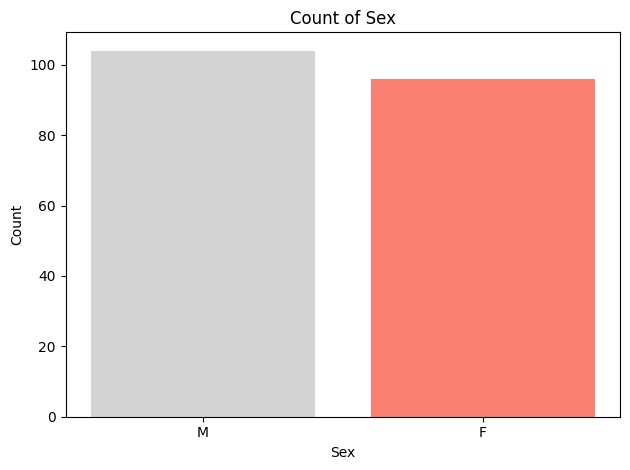

In [11]:
sex_counts = df.Sex.value_counts()

plt.bar(sex_counts.index, sex_counts.values, color=['lightgray', 'salmon'])
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Blood Pressure Level Distribution

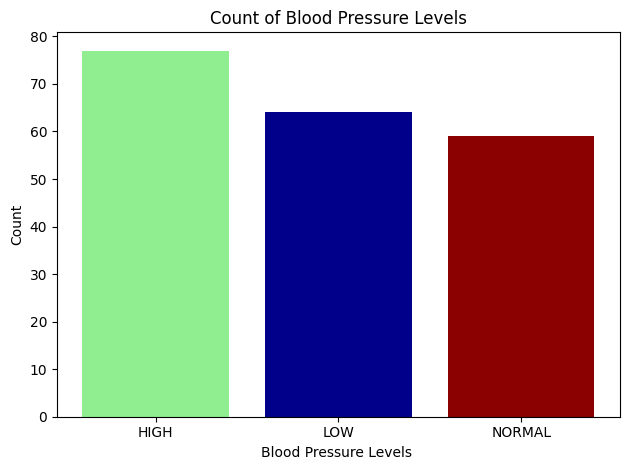

In [12]:
Bp_counts = df['BP'].value_counts()

plt.bar(Bp_counts.index, Bp_counts.values, color=['lightgreen', 'darkblue','darkred'])
plt.title('Count of Blood Pressure Levels')
plt.xlabel('Blood Pressure Levels ')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Cholesterol Level Distribution

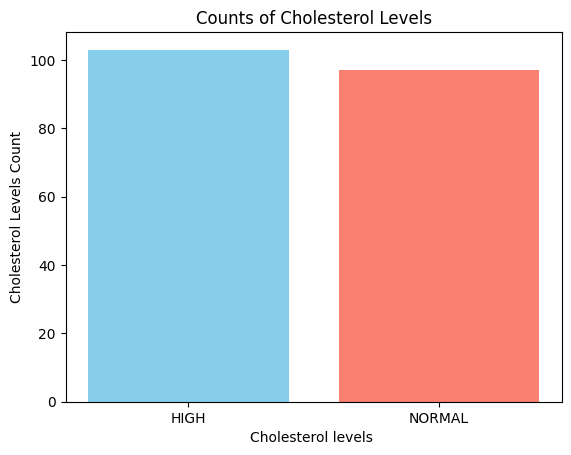

In [13]:
CholesterolLevelsCount = df.Cholesterol.value_counts()

plt.bar(CholesterolLevelsCount.index, CholesterolLevelsCount.values, color= ['skyblue', 'salmon'])
plt.title('Counts of Cholesterol Levels')
plt.xlabel('Cholesterol levels ')
plt.ylabel('Cholesterol Levels Count')
plt.show()

## Drug Type Frequency

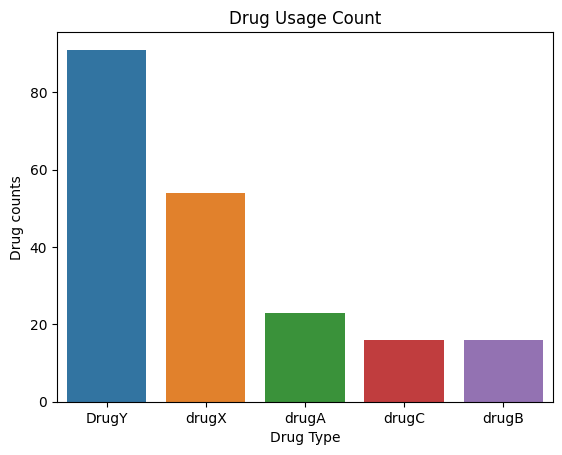

In [14]:
drug_count = df.Drug.value_counts()

sns.barplot( x= drug_count.index, y= drug_count.values)
plt.title('Drug Usage Count')
plt.xlabel('Drug Type')
plt.ylabel('Drug counts')
plt.show()

## Blood Pressure distribution based on Cholesterol

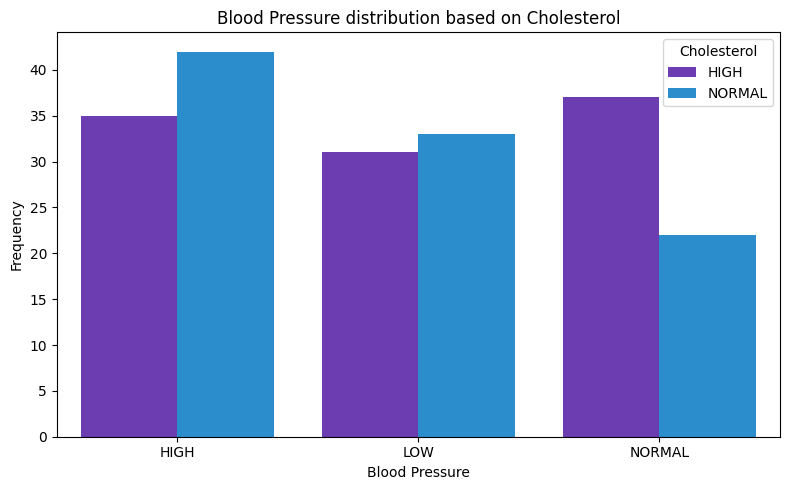

In [15]:
# Crosstab to get counts
ct = pd.crosstab(df.BP, df.Cholesterol)

# Reset index to prepare for melt
ct_reset = ct.reset_index()

# Melt the dataframe to long-form for sns
df_melted = ct_reset.melt(id_vars='BP', var_name='Cholesterol', value_name='Count')

# Plot with seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=df_melted, x='BP', y='Count', hue='Cholesterol', palette=['#6929c4', '#1192e8'])

plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Cholesterol')
plt.tight_layout()
plt.show()

# 6- Data Preprocessing

## **Convert Age to categorical data**
* young -> less 18 years old
* adult -> 19 - 35
* middle-aged -> 36 - 50
* old -> more than 50

In [16]:
bins = [0 ,18, 36, 51, float('inf')]
labels = ['young', 'adult', 'middle-aged', 'old']
df.Age = pd.cut(df.Age, bins = bins, labels=labels)

In [17]:
df.Age.head(10)

0          adult
1    middle-aged
2    middle-aged
3          adult
4            old
5          adult
6    middle-aged
7    middle-aged
8            old
9    middle-aged
Name: Age, dtype: category
Categories (4, object): ['young' < 'adult' < 'middle-aged' < 'old']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    category
 1   Sex          200 non-null    object  
 2   BP           200 non-null    object  
 3   Cholesterol  200 non-null    object  
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    object  
dtypes: category(1), float64(1), object(4)
memory usage: 8.3+ KB


****

## Encoding 

**Age**
* 0 -> young
* 1 -> adult
* 2 -> middle-aged
* 3 -> old

**Sex**
* 0 -> F
* 1 -> M

**BP**
* 0 -> HIGH
* 1 -> LOW
* 2 -> NORMAL

**Cholesterol**
* 0 -> HIGH
* 1 -> NORMAL

## **Scale data**

**Apply encode Technique**

## ploting Decision tree

[Text(0.625, 0.875, 'x[4] <= 0.388\ngini = 0.68\nsamples = 160\nvalue = [76, 17, 13, 11, 43]'),
 Text(0.5, 0.625, 'x[2] <= 0.25\ngini = 0.656\nsamples = 84\nvalue = [0, 17, 13, 11, 43]'),
 Text(0.25, 0.375, 'x[0] <= 0.833\ngini = 0.491\nsamples = 30\nvalue = [0, 17, 13, 0, 0]'),
 Text(0.125, 0.125, 'gini = 0.105\nsamples = 18\nvalue = [0, 17, 1, 0, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.75, 0.375, 'x[2] <= 0.75\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 0, 11, 43]'),
 Text(0.625, 0.125, 'gini = 0.499\nsamples = 23\nvalue = [0, 0, 0, 11, 12]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 0, 31]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 76\nvalue = [76, 0, 0, 0, 0]')]

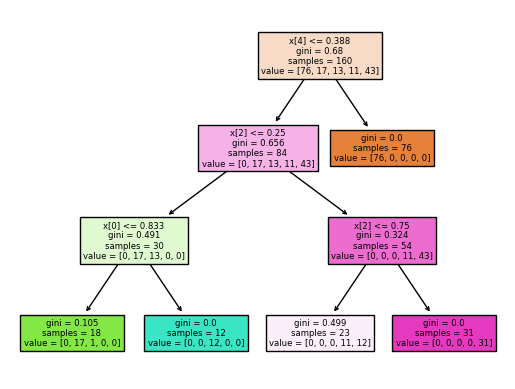

In [26]:
from sklearn import tree
tree.plot_tree(model, filled=True)


## Top 3 Performing Models by F1-Score

In [27]:
from sklearn.metrics import classification_report

# get Top 3 by F1-score
top_3 = results_df.sort_values(by='F1-Score', ascending=False).head(3)

for _, row in top_3.iterrows():
    scale_name = row['Scaler']
    model_name = row['Model']
    
    scaler = scalers[scale_name]
    model = models[model_name]


    # Fit the scaler on training data and transform both train and test sets
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)

    # Train the model
    model.fit(X_train_s, y_train)

    # Predict using the test set
    y_pred = model.predict(X_test_s)

    print(f"\n🔍 Classification Report for: Scaler = {scale_name} | Model = {model_name}")
    print(classification_report(y_test, y_pred))



🔍 Classification Report for: Scaler = standard | Model = SVM
              precision    recall  f1-score   support

       DrugY       0.94      1.00      0.97        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.80      0.89         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.97        40
   macro avg       0.99      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40


🔍 Classification Report for: Scaler = robust | Model = SVM
              precision    recall  f1-score   support

       DrugY       0.94      1.00      0.97        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.80      0.89         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.97        40
   macro 